# Import necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import DiadFit as pf
import os
import pickle

In [2]:
#%pip install --upgrade DiadFit
#%pip install Thermobar

# Set up folders and paths

In [3]:
if os.name=='posix':
    slash='/'
else:
    slash='\\'

MasterFolder=os.path.dirname(os.path.dirname(os.getcwd()))

# #Folder to save figures

# figpath=MasterFolder +slash+'Figs'
# if not os.path.exists(figpath):
#     os.mkdir(figpath)

# #Folder to save full datasets

compilation_folder=MasterFolder +slash+"Data_processing_notebooks"+slash+'Data_processing_SWRZ'+slash+'Notebook_Compiled_data'
if not os.path.exists(compilation_folder):
    os.mkdir(compilation_folder)

# Import the Raman-mineralEDS merged data
- Here we filter out the standards

In [99]:
KL_SWRZ_RamanEDS=pd.read_excel(compilation_folder+slash+'KL_SWRZ_Raman_EDS_Merged.xlsx')
df_combo=KL_SWRZ_RamanEDS.copy()
df_combo =df_combo.loc[:, ~df_combo.columns.str.contains('Unnamed')]

df_combo=df_combo.loc[~df_combo['Type'].str.contains('Std')].reset_index(drop=True)

df_combo

,filename_x,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Line_Si,Line_Ca,Line_Mn,Line_Fe,Line_Ni,Line_Al,Line_Ti,Line_Cr,SampleID,Fo
0,K24_10_FIA,0.048859,0.004082,0.001386,0.003840,102.873563,0.003498,0.000953,0.003373,11.878,...,K series,K series,K series,K series,Kα,NaN,NaN,NaN,K24_10_FIA,0.854767
1,K24_10_FIB,0.056119,0.004361,0.002092,0.003826,102.891885,0.005280,0.000955,0.005204,11.886,...,K series,K series,K series,K series,Kα,NaN,NaN,NaN,K24_10_FIB,0.867048
2,K24_11_FIA,0.125982,0.004292,0.001919,0.003839,103.068198,0.004843,0.000959,0.004757,11.889,...,K series,K series,K series,K series,Kα,NaN,NaN,NaN,"K24_11_FIA,B",0.853562
3,K24_11_FIB,0.085747,0.012513,0.011921,0.003801,102.966658,0.030086,0.000960,0.030134,11.887,...,K series,K series,K series,K series,Kα,NaN,NaN,NaN,"K24_11_FIA,B",0.853562
4,K24_11_FIC,0.129648,0.004284,0.001886,0.003846,103.077452,0.004761,0.000962,0.004672,11.889,...,K series,K series,K series,K series,Kα,NaN,NaN,NaN,K24_11_FIC,0.854732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,K24_40_FIA,0.113685,0.004704,0.002748,0.003818,103.037164,0.006935,0.000824,0.006900,11.969,...,K series,K series,K series,K series,Kα,NaN,NaN,NaN,K24_40_FIA,0.888021
147,K24_40_FIB,0.127505,0.004580,0.002494,0.003842,103.072041,0.006293,0.000826,0.006251,11.958,...,K series,K series,K series,K series,Kα,NaN,NaN,NaN,K24_40_core,0.890827
148,KL0919-013-A-rep2-6mW,0.429251,0.005502,0.004975,0.002350,103.779896,0.011091,0.000771,0.011087,6.018,...,K series,K series,K series,K series,Kα,NaN,NaN,NaN,KL0919_013_FIA,0.887041
149,KL0919-013-B-rep2-6mW,0.387546,0.003067,0.001973,0.002348,103.686032,0.004482,0.000772,0.004424,6.022,...,K series,K series,K series,K series,Kα,NaN,NaN,NaN,KL0919_013_FIB,0.887478


# Now we will load the Temp vs Fo correction relationship for Kilauea
- This is from DeVitre and Wieser (2024) GPL

In [100]:
with open(os.getcwd()+slash+'Helper files'+slash+'TempFoModel.pkl', 'rb') as f:
    Pf_TempFo = pickle.load(f)

## Let's calculate the Temperature from Fo using the correction we loaded

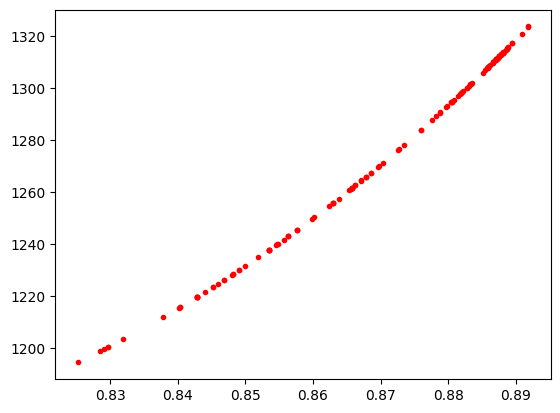

In [101]:
df_combo['Temp_from_Fo_all']=Pf_TempFo(df_combo['Fo'])
MeanT=np.nanmean(df_combo['Temp_from_Fo_all'])
df_combo['Temp_from_Fo_all'] = df_combo['Temp_from_Fo_all'].fillna(MeanT)

# Create 'Temp_error' column based on whether 'Temp_from_Fo' is a number
df_combo['Temp_error'] = np.where(df_combo['Temp_from_Fo_all'] == MeanT, 100, 50)
plt.plot(df_combo['Fo'], df_combo['Temp_from_Fo_all'], '.r')

# Now we will load the XH2O correction relationship for Kilauea
- This is from DeVitre and Wieser (2024) GPL

In [102]:

# This is the lowest XH2O
with open(os.getcwd()+slash+'Helper files'+slash+'PXH2O_min.pkl', 'rb') as f:
    Pf_low = pickle.load(f)
# This is the median XH2O
with open(os.getcwd()+slash+'Helper files'+slash+'PXH2O_max.pkl', 'rb') as f:
    Pf_max = pickle.load(f)
# This is the median XH2O - pressure  relationship. 
with open(os.getcwd()+slash+'Helper files'+slash+'PXH2O_av.pkl', 'rb') as f:
    Pf_med = pickle.load(f)

# And its defined as XH2O_av=1-Pf_med(P_SW96['P_MPa'])

## Now calculate the XH2O based on the correction we loaded

### First we have to calculate a first approximation pressure with pure CO2 EOS

In [103]:
P_SW96=pf.calculate_P_for_rho_T(CO2_dens_gcm3=df_combo['Density g/cm3'], 
                                T_K=df_combo['Temp_from_Fo_all']+273.15, EOS='SW96')

df_combo.loc[:,'P_kbar_pureCO2_firstapproximation']=P_SW96['P_kbar']
df_combo

,filename_x,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Line_Fe,Line_Ni,Line_Al,Line_Ti,Line_Cr,SampleID,Fo,Temp_from_Fo_all,Temp_error,P_kbar_pureCO2_firstapproximation
0,K24_10_FIA,0.048859,0.004082,0.001386,0.003840,102.873563,0.003498,0.000953,0.003373,11.878,...,K series,Kα,NaN,NaN,NaN,K24_10_FIA,0.854767,1240.043250,50,0.144386
1,K24_10_FIB,0.056119,0.004361,0.002092,0.003826,102.891885,0.005280,0.000955,0.005204,11.886,...,K series,Kα,NaN,NaN,NaN,K24_10_FIB,0.867048,1264.188539,50,0.169413
2,K24_11_FIA,0.125982,0.004292,0.001919,0.003839,103.068198,0.004843,0.000959,0.004757,11.889,...,K series,Kα,NaN,NaN,NaN,"K24_11_FIA,B",0.853562,1237.848480,50,0.393081
3,K24_11_FIB,0.085747,0.012513,0.011921,0.003801,102.966658,0.030086,0.000960,0.030134,11.887,...,K series,Kα,NaN,NaN,NaN,"K24_11_FIA,B",0.853562,1237.848480,50,0.259715
4,K24_11_FIC,0.129648,0.004284,0.001886,0.003846,103.077452,0.004761,0.000962,0.004672,11.889,...,K series,Kα,NaN,NaN,NaN,K24_11_FIC,0.854732,1239.979226,50,0.406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,K24_40_FIA,0.113685,0.004704,0.002748,0.003818,103.037164,0.006935,0.000824,0.006900,11.969,...,K series,Kα,NaN,NaN,NaN,K24_40_FIA,0.888021,1313.469996,50,0.369927
147,K24_40_FIB,0.127505,0.004580,0.002494,0.003842,103.072041,0.006293,0.000826,0.006251,11.958,...,K series,Kα,NaN,NaN,NaN,K24_40_core,0.890827,1320.887690,50,0.421387
148,KL0919-013-A-rep2-6mW,0.429251,0.005502,0.004975,0.002350,103.779896,0.011091,0.000771,0.011087,6.018,...,K series,Kα,NaN,NaN,NaN,KL0919_013_FIA,0.887041,1310.926867,50,1.875309
149,KL0919-013-B-rep2-6mW,0.387546,0.003067,0.001973,0.002348,103.686032,0.004482,0.000772,0.004424,6.022,...,K series,Kα,NaN,NaN,NaN,KL0919_013_FIB,0.887478,1312.058665,50,1.618119


### Next, we calculate the XH2O first approximation

In [104]:
## Lets calculate XH2O from Kil
XH2O_av=1-Pf_med(df_combo['P_kbar_pureCO2_firstapproximation']*100)
XH2O_av[XH2O_av<0]=0.02

XH2O_min=1-Pf_low(df_combo['P_kbar_pureCO2_firstapproximation']*100)
XH2O_min[XH2O_min<0]=0.02

XH2O_max=1-Pf_max(df_combo['P_kbar_pureCO2_firstapproximation']*100)
XH2O_max[XH2O_max<0]=0.02

df_combo['XH2O_firstapproximation']=XH2O_av
df_combo['XH2O_firstapproximation']=df_combo['XH2O_firstapproximation'].fillna(0)

### Now we recalculate pressure using Duan and Zhang 2006, taking XH2O into account

In [105]:
P_DZ06=pf.calculate_entrapment_P_XH2O(XH2O=XH2O_av, CO2_dens_gcm3=df_combo['Density g/cm3'],
                 T_K=df_combo['Temp_from_Fo_all']+273.15, T_K_ambient=37+273.15, fast_calcs=False, Hloss=True)
P_DZ06_MinXH2O=pf.calculate_entrapment_P_XH2O(XH2O=XH2O_min, CO2_dens_gcm3=df_combo['Density g/cm3'],
                 T_K=df_combo['Temp_from_Fo_all']+273.15, T_K_ambient=37+273.15, fast_calcs=False, Hloss=True)
P_DZ06_MaxXH2O=pf.calculate_entrapment_P_XH2O(XH2O=XH2O_max, CO2_dens_gcm3=df_combo['Density g/cm3'],
                 T_K=df_combo['Temp_from_Fo_all']+273.15, T_K_ambient=37+273.15, fast_calcs=False, Hloss=True)

df_combo.loc[:,'P_kbar_DZ_recalc_4XH2Ocalc']=P_DZ06['P_kbar_mixCO2_DZ06_no_Hloss']

### And now we recalculate XH2O to make sure it doesn't change with iterations

In [106]:
# Now lets do one more iteration - multiple ones really dont change much. 
XH2O_av2=1-Pf_med(100*P_DZ06['P_kbar_mixCO2_DZ06_no_Hloss'])
XH2O_av2[XH2O_av2<0]=0.02

XH2O_min2=1-Pf_low(100*P_DZ06_MinXH2O['P_kbar_mixCO2_DZ06_no_Hloss'])
XH2O_min2[XH2O_min2<0]=0.02

XH2O_max2=1-Pf_max(100*P_DZ06_MaxXH2O['P_kbar_mixCO2_DZ06_no_Hloss'])
XH2O_max2[XH2O_max2<0]=0.02

# P_DZ062=pf.calculate_entrapment_P_XH2O(XH2O=XH2O_av2, CO2_dens_gcm3=df_combo['Density g/cm3'],
#                  T_K=df_combo['Temp_from_Fo_all']+273.15, T_K_ambient=37+273.15, fast_calcs=False, Hloss=True)
# P_DZ06_MinXH2O2=pf.calculate_entrapment_P_XH2O(XH2O=XH2O_min2, CO2_dens_gcm3=df_combo['Density g/cm3'],
#                  T_K=df_combo['Temp_from_Fo_all']+273.15, T_K_ambient=37+273.15, fast_calcs=False, Hloss=True)
# P_DZ06_MaxXH2O2=pf.calculate_entrapment_P_XH2O(XH2O=XH2O_max2, CO2_dens_gcm3=df_combo['Density g/cm3'],
#                  T_K=df_combo['Temp_from_Fo_all']+273.15, T_K_ambient=37+273.15, fast_calcs=False, Hloss=True)

df_combo['XH2O_av_preferred']=XH2O_av2
df_combo['XH2O_min_final']=XH2O_min2
df_combo['XH2O_max_final']=XH2O_max2
df_combo['XH2O_min_final']=df_combo['XH2O_min_final'].fillna(0)
df_combo['XH2O_max_final']=df_combo['XH2O_max_final'].fillna(0)
df_combo['XH2O_av_preferred']=df_combo['XH2O_av_preferred'].fillna(0)

## Now that we have XH2O we can properly calculate pressures and depths and propagate uncertainty

In [107]:
## Duan and Zhang Error propagate. 
MC_Av_rho_T_df_B, MC_All_rho_T_df_B, fig=pf.propagate_FI_uncertainty(
T_K=df_combo['Temp_from_Fo_all']+273.15,
error_T_K=df_combo['Temp_error'], error_type_T_K='Abs', error_dist_T_K='normal',
CO2_dens_gcm3=df_combo['Density g/cm3'],error_CO2_dens=df_combo['σ Density g/cm3'], 
error_type_CO2_dens='Abs', error_dist_CO2_dens='normal',
XH2O=df_combo['XH2O_av_preferred'], error_XH2O=pd.Series(0.5*np.abs(df_combo['XH2O_max_final']-df_combo['XH2O_min_final'])), error_type_XH2O='Abs', error_dist_XH2O='normal',
sample_ID=df_combo['filename_4merge'],
model='denlinger_lerner',
N_dup=500, fig_i=0, plot_figure=False)

You have entered a value for XH2O, so we are now using the EOS of Duan and Zhang 200 regardless of what model you selected. If you dont want this, specify XH2O=None
Please note, the DZ2006 EOS is about 5-40X slower to run than the SP94 and SW94 EOS
We are using multiprocessing based on your selected EOS. You can override this by setting multiprocess=False in the function, but it might slow it down a lot
Number of processors:  8


### And now, merge it back into the dataframe

In [109]:
PDframe=MC_Av_rho_T_df_B['Filename'].rename("filename_4merge")

FI_Raman_EDS_PD=df_combo.merge(PDframe, on='filename_4merge', how='left')
FI_Raman_EDS_PD

,filename_x,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,SampleID,Fo,Temp_from_Fo_all,Temp_error,P_kbar_pureCO2_firstapproximation,XH2O_firstapproximation,P_kbar_DZ_recalc_4XH2Ocalc,XH2O_av_preferred,XH2O_min_final,XH2O_max_final
0,K24_10_FIA,0.048859,0.004082,0.001386,0.003840,102.873563,0.003498,0.000953,0.003373,11.878,...,K24_10_FIA,0.854767,1240.043250,50,0.144386,0.176082,0.173712,0.160347,0.079462,0.234736
1,K24_10_FIB,0.056119,0.004361,0.002092,0.003826,102.891885,0.005280,0.000955,0.005204,11.886,...,K24_10_FIB,0.867048,1264.188539,50,0.169413,0.162563,0.200467,0.147244,0.073281,0.214878
2,K24_11_FIA,0.125982,0.004292,0.001919,0.003839,103.068198,0.004843,0.000959,0.004757,11.889,...,"K24_11_FIA,B",0.853562,1237.848480,50,0.393081,0.083090,0.425286,0.076657,0.037651,0.113611
3,K24_11_FIB,0.085747,0.012513,0.011921,0.003801,102.966658,0.030086,0.000960,0.030134,11.887,...,"K24_11_FIA,B",0.853562,1237.848480,50,0.259715,0.122193,0.293140,0.110294,0.055132,0.160981
4,K24_11_FIC,0.129648,0.004284,0.001886,0.003846,103.077452,0.004761,0.000962,0.004672,11.889,...,K24_11_FIC,0.854732,1239.979226,50,0.406250,0.080335,0.438278,0.074343,0.036403,0.110397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,K24_40_FIA,0.113685,0.004704,0.002748,0.003818,103.037164,0.006935,0.000824,0.006900,11.969,...,K24_40_FIA,0.888021,1313.469996,50,0.369927,0.088370,0.402414,0.081120,0.040040,0.119813
147,K24_40_FIB,0.127505,0.004580,0.002494,0.003842,103.072041,0.006293,0.000826,0.006251,11.958,...,K24_40_core,0.890827,1320.887690,50,0.421387,0.077382,0.453051,0.071896,0.035070,0.107012
148,KL0919-013-A-rep2-6mW,0.429251,0.005502,0.004975,0.002350,103.779896,0.011091,0.000771,0.011087,6.018,...,KL0919_013_FIA,0.887041,1310.926867,50,1.875309,0.020000,1.910712,0.020000,0.020000,0.020000
149,KL0919-013-B-rep2-6mW,0.387546,0.003067,0.001973,0.002348,103.686032,0.004482,0.000772,0.004424,6.022,...,KL0919_013_FIB,0.887478,1312.058665,50,1.618119,0.020000,1.647103,0.020000,0.020000,0.020000


# UP TO HERE I CLEANED UP ON JAN 8 2025

In [111]:
K24=df_combo['filename_4merge'].str.contains('K24')
U919=df_combo['filename_4merge'].str.contains('919')

In [112]:
# df_combo['Fo']=df_combo['Fo'].fillna(0.9)

## Lets get the equilibrium Olivine Fo contents here 

In [55]:
Ulu_MG_input=pt.import_excel('/Users/cljd/Documents/Python_dev/PrePostCalderaKil_2025/Version_on_pcloud/Kilauea2024_RapidResponseSWRZ_GDrive_latest/1974_olivine_glass_data/UluData.xlsx',
                         sheet_name='Matrix Glass')
Ulu_all=Ulu_MG_input['my_input'] ## All columns
Ulu_Liqs_all=Ulu_MG_input['Liqs'] ## Just Liquid columns
Ulu_Liqs_19=Ulu_Liqs_all.loc[Ulu_all['Eruption']==919]
Ulu_Liqs_19.head()
Mean_19=np.mean(Ulu_Liqs_19)

In [56]:
## Glasses 


K24_MG_input=pt.import_excel(r'GlassData2024.xlsx',
                         sheet_name='glass', suffix='_Liq')
K24_all=K24_MG_input['my_input'] ## All columns
K24_Liqs_all=K24_MG_input['Liqs'] ## Just Liquid columns
Liq_Mean_24=np.mean(K24_Liqs_all)

In [57]:
K24_Liqs_all

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq
0,49.5836,1.9870,13.9269,11.9916,0.2289,6.5309,10.7876,2.6928,0.2097,0.0,0.2532,0.0,0.0,0.0,0.0,0.0,0
1,49.4155,2.0029,13.8746,11.8569,0.2258,6.6142,10.7479,2.7164,0.1747,0.0,0.2057,0.0,0.0,0.0,0.0,0.0,1
2,49.6459,2.0178,13.8297,11.8792,0.2454,6.5330,10.8564,2.7839,0.2095,0.0,0.1946,0.0,0.0,0.0,0.0,0.0,2
3,50.6236,2.9163,13.9494,10.8721,0.1965,6.3378,10.9124,2.4751,0.5062,0.0,0.2584,0.0,0.0,0.0,0.0,0.0,3
4,50.4679,2.8971,13.9718,10.8212,0.2244,6.3854,10.8649,2.5100,0.5404,0.0,0.2302,0.0,0.0,0.0,0.0,0.0,4
5,51.1935,2.9535,14.1871,10.8275,0.1853,6.4555,10.9437,2.4221,0.5239,0.0,0.2929,0.0,0.0,0.0,0.0,0.0,5
6,50.8685,2.8981,14.1024,10.8489,0.1964,6.4336,10.9767,2.5362,0.5137,0.0,0.2931,0.0,0.0,0.0,0.0,0.0,6
7,51.4317,2.9307,14.2734,10.9645,0.1720,6.5610,11.0545,2.5762,0.5205,0.0,0.2915,0.0,0.0,0.0,0.0,0.0,7


In [58]:
Eq_Ol_19=pt.calculate_eq_ol_content(liq_comps=Ulu_Liqs_19, Kd_model="Shea2022",Fe3Fet_Liq=0.18)
Eq_Ol_24=pt.calculate_eq_ol_content(liq_comps=K24_Liqs_all, Kd_model="Shea2022",Fe3Fet_Liq=0.18)

In [59]:
np.mean(Eq_Ol_19['Eq Fo (Shea, Kd=0.335)'])

0.834256220498497

In [60]:
MC_Av_rho_T_df_B

,Filename,i,CO2_density_input,SingleCalc_D_km,SingleCalc_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,std_dev_MC_P_kbar,std_dev_MC_P_kbar_from_percentile,Mean_MC_D_km,...,T_K_input,error_T_K,CO2_dens_gcm3_input,error_CO2_dens_gcm3,crust_dens_kgm3_input,error_crust_dens_kgm3,model,EOS,XH2O_input,error_XH2O
0,K24_10_FIA_index41,0.0,0.048859,0.765054,0.174482,0.180207,0.177724,0.027972,0.026310,0.789301,...,1513.193250,50.0,0.048859,0.004082,None,0.0,denlinger_lerner,DZ06,0.176082,0.098100
1,K24_10_FIB_index42,1.0,0.056119,0.880502,0.201400,0.207104,0.204533,0.029300,0.027466,0.904491,...,1537.338539,50.0,0.056119,0.004361,None,0.0,denlinger_lerner,DZ06,0.162563,0.090331
2,K24_11_FIA_index43,2.0,0.125982,1.824668,0.427481,0.431687,0.429072,0.029930,0.028741,1.841449,...,1510.998480,50.0,0.125982,0.004292,None,0.0,denlinger_lerner,DZ06,0.083090,0.045284
3,K24_11_FIB_index44,3.0,0.085747,1.275439,0.294670,0.301187,0.298416,0.052669,0.051561,1.301530,...,1510.998480,50.0,0.085747,0.012513,None,0.0,denlinger_lerner,DZ06,0.122193,0.067263
4,K24_11_FIC_index45,4.0,0.129648,1.877827,0.440530,0.444677,0.442191,0.030028,0.028910,1.894326,...,1513.129226,50.0,0.129648,0.004284,None,0.0,denlinger_lerner,DZ06,0.080335,0.043765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,K24_40_FIA_index166,144.0,0.113685,1.730300,0.404402,0.408076,0.406533,0.029734,0.029925,1.744982,...,1586.619996,50.0,0.113685,0.004704,None,0.0,denlinger_lerner,DZ06,0.088370,0.048212
145,K24_40_FIB_index167,145.0,0.127505,1.937626,0.455249,0.454856,0.454017,0.030871,0.030812,1.935641,...,1594.037690,50.0,0.127505,0.004580,None,0.0,denlinger_lerner,DZ06,0.077382,0.042144
146,KL0919-013-A-rep2-6mW_index147,146.0,0.429251,7.223926,1.921074,1.917373,1.922320,0.080665,0.078526,7.210999,...,1584.076867,50.0,0.429251,0.005502,None,0.0,denlinger_lerner,DZ06,0.020000,0.000000
147,KL0919-013-B-rep2-6mW_index148,147.0,0.387546,6.335518,1.654795,1.651313,1.653855,0.063733,0.064060,6.323106,...,1585.208665,50.0,0.387546,0.003067,None,0.0,denlinger_lerner,DZ06,0.020000,0.000000


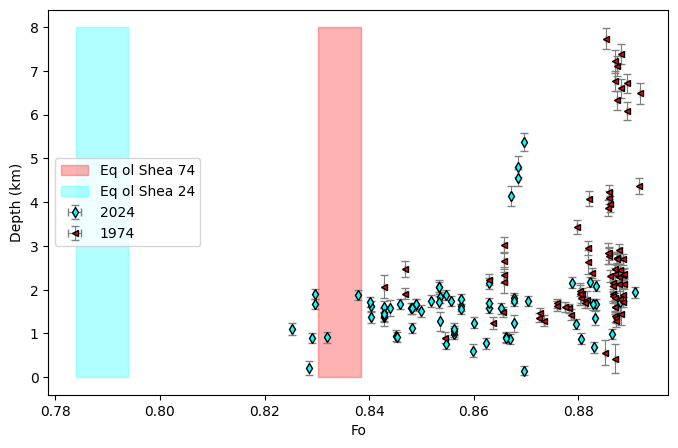

In [61]:
fig, (ax1) = plt.subplots(1, 1, figsize = (8,5))

# Calculate x coordinates
x1 = np.mean(Eq_Ol_19['Eq Fo (Shea, Kd=0.325)'])
x2 = np.mean(Eq_Ol_19['Eq Fo (Shea, Kd=0.345)'])

# Plot rectangle
plt.fill_betweenx(y=[0, 8], x1=x1, x2=x2, color='red', alpha=0.3, label='Eq ol Shea 74')

# Calculate x coordinates
x1 = np.mean(Eq_Ol_24['Eq Fo (Shea, Kd=0.325)'])
x2 = np.mean(Eq_Ol_24['Eq Fo (Shea, Kd=0.345)'])

# Plot rectangle
plt.fill_betweenx(y=[0, 8], x1=x1, x2=x2, color='cyan', alpha=0.3, label='Eq ol Shea 24')


ax1.errorbar(df_combo['Fo'].loc[K24], MC_Av_rho_T_df_B['SingleCalc_D_km'].loc[K24], xerr=0, yerr=MC_Av_rho_T_df_B['std_dev_MC_D_km_from_percentile'].loc[K24],
             fmt='d', ecolor='grey', elinewidth=0.8, mfc='cyan', ms=5, mec='k', capsize=3, label='2024')
ax1.errorbar(df_combo['Fo'].loc[U919], MC_Av_rho_T_df_B['SingleCalc_D_km'].loc[U919], xerr=0, yerr=MC_Av_rho_T_df_B['std_dev_MC_D_km_from_percentile'].loc[U919],
             fmt='<', ecolor='grey', elinewidth=0.8, mfc='red', ms=5, mec='k', capsize=3, label='1974')


ax1.set_xlabel('Fo')
ax1.set_ylabel('Depth (km)')
plt.legend()#
fig.savefig('FoDepth.png', dpi=300)

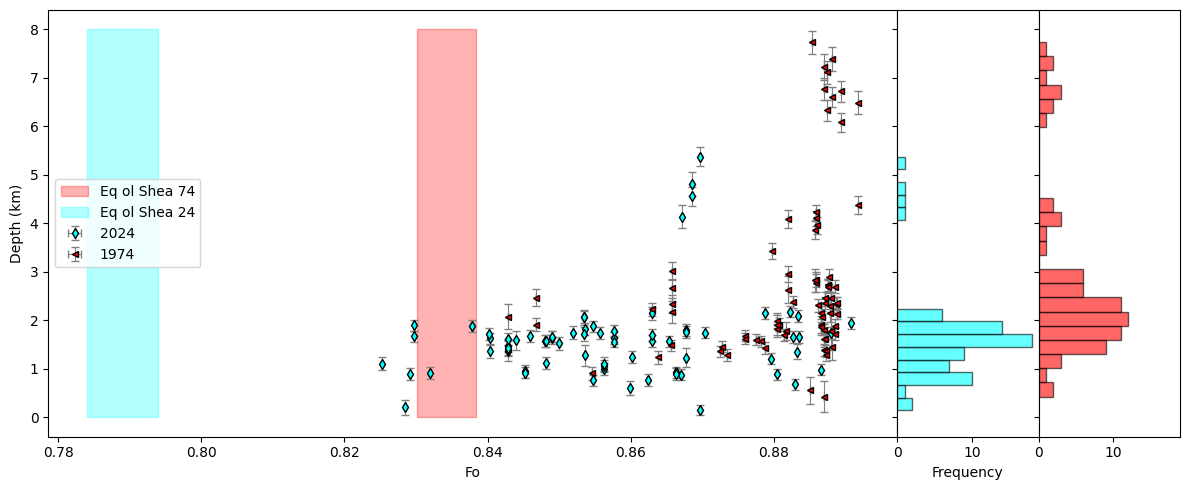

In [62]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(12, 5))
gs = gridspec.GridSpec(1, 3, width_ratios=[3, 0.5, 0.5], wspace=0)

ax1 = plt.subplot(gs[0])

# Calculate x coordinates and plot rectangles for Eq_Ol_19
x1 = np.mean(Eq_Ol_19['Eq Fo (Shea, Kd=0.325)'])
x2 = np.mean(Eq_Ol_19['Eq Fo (Shea, Kd=0.345)'])
ax1.fill_betweenx(y=[0, 8], x1=x1, x2=x2, color='red', alpha=0.3, label='Eq ol Shea 74')

# Calculate x coordinates and plot rectangles for Eq_Ol_24
x1 = np.mean(Eq_Ol_24['Eq Fo (Shea, Kd=0.325)'])
x2 = np.mean(Eq_Ol_24['Eq Fo (Shea, Kd=0.345)'])
ax1.fill_betweenx(y=[0, 8], x1=x1, x2=x2, color='cyan', alpha=0.3, label='Eq ol Shea 24')

# Plot error bars
ax1.errorbar(df_combo['Fo'].loc[K24], MC_Av_rho_T_df_B['SingleCalc_D_km'].loc[K24], xerr=0, yerr=MC_Av_rho_T_df_B['std_dev_MC_D_km_from_percentile'].loc[K24],
             fmt='d', ecolor='grey', elinewidth=0.8, mfc='cyan', ms=5, mec='k', capsize=3, label='2024')
ax1.errorbar(df_combo['Fo'].loc[U919], MC_Av_rho_T_df_B['SingleCalc_D_km'].loc[U919], xerr=0, yerr=MC_Av_rho_T_df_B['std_dev_MC_D_km_from_percentile'].loc[U919],
             fmt='<', ecolor='grey', elinewidth=0.8, mfc='red', ms=5, mec='k', capsize=3, label='1974')

ax1.set_xlabel('Fo')
ax1.set_ylabel('Depth (km)')
ax1.legend()

# Histogram plot
ax2 = plt.subplot(gs[1], sharey=ax1)
ax3 = plt.subplot(gs[2], sharey=ax1, sharex=ax2)
ax2.hist(MC_Av_rho_T_df_B['SingleCalc_D_km'].loc[K24], bins=20, stacked=True, orientation='horizontal', color=['cyan'], ec='k', alpha=0.6)
ax3.hist(MC_Av_rho_T_df_B['SingleCalc_D_km'].loc[U919], bins=25, stacked=True, orientation='horizontal', color=['red'], ec='k', alpha=0.6)

ax2.set_xlabel('Frequency')
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax3.get_yticklabels(), visible=False)
plt.tight_layout()
fig.savefig('FoDepth.png', dpi=300)
plt.show()

In [87]:
df_merged=pd.merge(left=df_combo,right=MC_Av_rho_T_df_B,left_on='filename_4merge',right_on='Filename',suffixes=('_og', '_pwrecalc'))
# df_merged.to_clipboard(excel=True)

EBSD_tags=pd.read_excel('/Users/cljd/pCloud Drive/WORK-GENERAL/POSTDOC-UCB/BERKELEY-VIBE/Documents/Projects/Kil_SWRZ/EBSD/Combined_EBSD/Raman+EDS+EBSDtags.xlsx')

df_wEBSDtags=pd.merge(left=df_merged,right=EBSD_tags,left_on='filename_4merge',right_on='filename_4merge')

df_wEBSDtags.to_clipboard(excel=True)

In [64]:
EBSD_data=pd.read_excel('/Users/cljd/pCloud Drive/WORK-GENERAL/POSTDOC-UCB/BERKELEY-VIBE/Documents/Projects/Kil_SWRZ/EBSD/Combined_EBSD/EBSD_combined_all.xlsx')

df_wEBSDtags['EBSDname+grainID'] = df_wEBSDtags['EBSD_simple_name'].astype(str) +'_'+ df_wEBSDtags['EBSD_grainID'].astype(str)
EBSD_data['EBSDname+grainID'] = EBSD_data['EBSD_name'].astype(str) + '_'+ EBSD_data['grainID'].astype(str)

final_df=pd.merge(left=df_wEBSDtags,left_on='EBSDname+grainID',right=EBSD_data,right_on='EBSDname+grainID',suffixes=('_main', '_EBSDdata'),how='left')

##### Export fully merge data ####

final_df.to_excel("Final_data_wEBSD.xlsx")
final_df

,Mount,filename,filename_4merge,Name_on_SEM,Notes regarding SEM matching,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,...,GB Length/Sqrt Size,Total GB length,Tilt length,Twist length,Perc Tilt,Perc Twist,Perc unclassified,Divangle,Deformed,Day_EBSDdata
0,A,K24_10_FIA,K24_10_FIA_index41,K24_10_FIA,NaN,0.048859,0.004082,0.001386,0.003840,102.873563,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A,K24_10_FIB,K24_10_FIB_index42,K24_10_FIB,NaN,0.056119,0.004361,0.002092,0.003826,102.891885,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A,K24_11_FIA,K24_11_FIA_index43,"K24_11_FIA,B",NaN,0.125982,0.004292,0.001919,0.003839,103.068198,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A,K24_11_FIB,K24_11_FIB_index44,"K24_11_FIA,B",NaN,0.085747,0.012513,0.011921,0.003801,102.966658,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A,K24_11_FIC,K24_11_FIC_index45,K24_11_FIC,NaN,0.129648,0.004284,0.001886,0.003846,103.077452,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,NaN,K24_40_FIA,K24_40_FIA_index166,K24_40_FIA,NaN,0.113685,0.004704,0.002748,0.003818,103.037164,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145,NaN,K24_40_FIB,K24_40_FIB_index167,K24_40_core,NaN,0.127505,0.004580,0.002494,0.003842,103.072041,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,NaN,KL0919-013-A-rep2-6mW,KL0919-013-A-rep2-6mW_index147,KL0919_013_FIA,NaN,0.429251,0.005502,0.004975,0.002350,103.779896,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,NaN,KL0919-013-B-rep2-6mW,KL0919-013-B-rep2-6mW_index148,KL0919_013_FIB,NaN,0.387546,0.003067,0.001973,0.002348,103.686032,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
K24=final_df['filename'].str.contains('K24')
U919=final_df['filename'].str.contains('919')

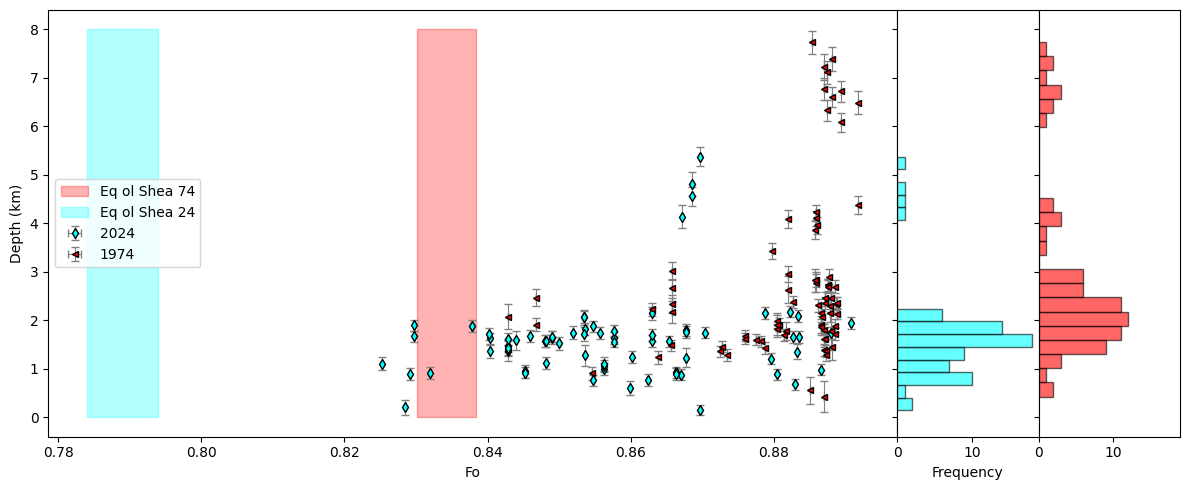

In [66]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Combine GOS values from both datasets
all_GOS = final_df['GOS']

# Global min and max of GOS
global_min_GOS = all_GOS.min()
global_max_GOS = all_GOS.max()

# Normalize GOS for marker sizing
normalized_GOS_K24 = (final_df['GOS'].loc[K24] - global_min_GOS) / (global_max_GOS - global_min_GOS)
normalized_GOS_U919 = (final_df['GOS'].loc[U919] - global_min_GOS) / (global_max_GOS - global_min_GOS)

# Scale marker sizes (e.g., between 5 and 15)
marker_size_K24 = 5 + 10 * normalized_GOS_K24
marker_size_U919 = 5 + 10 * normalized_GOS_U919

fig = plt.figure(figsize=(12, 5))
gs = gridspec.GridSpec(1, 3, width_ratios=[3, 0.5, 0.5], wspace=0)

ax1 = plt.subplot(gs[0])

# Calculate x coordinates and plot rectangles for Eq_Ol_19
x1 = np.mean(Eq_Ol_19['Eq Fo (Shea, Kd=0.325)'])
x2 = np.mean(Eq_Ol_19['Eq Fo (Shea, Kd=0.345)'])
ax1.fill_betweenx(y=[0, 8], x1=x1, x2=x2, color='red', alpha=0.3, label='Eq ol Shea 74')

# Calculate x coordinates and plot rectangles for Eq_Ol_24
x1 = np.mean(Eq_Ol_24['Eq Fo (Shea, Kd=0.325)'])
x2 = np.mean(Eq_Ol_24['Eq Fo (Shea, Kd=0.345)'])
ax1.fill_betweenx(y=[0, 8], x1=x1, x2=x2, color='cyan', alpha=0.3, label='Eq ol Shea 24')

# Plot error bars with marker sizes based on GOS
ax1.errorbar(final_df['Fo'].loc[K24], final_df['SingleCalc_D_km'].loc[K24], xerr=0, yerr=final_df['std_dev_MC_D_km_from_percentile'].loc[K24],
             fmt='d', ecolor='grey', elinewidth=0.8, mfc='cyan', mec='k', capsize=3, label='2024', ms=5)
ax1.errorbar(final_df['Fo'].loc[U919], final_df['SingleCalc_D_km'].loc[U919], xerr=0, yerr=final_df['std_dev_MC_D_km_from_percentile'].loc[U919],
             fmt='<', ecolor='grey', elinewidth=0.8, mfc='red', mec='k', capsize=3, label='1974', ms=5)

ax1.set_xlabel('Fo')
ax1.set_ylabel('Depth (km)')
ax1.legend()

# Histogram plot
ax2 = plt.subplot(gs[1], sharey=ax1)
ax3 = plt.subplot(gs[2], sharey=ax1, sharex=ax2)
ax2.hist(final_df['SingleCalc_D_km'].loc[K24], bins=20, stacked=True, orientation='horizontal', color=['cyan'], ec='k', alpha=0.6)
ax3.hist(final_df['SingleCalc_D_km'].loc[U919], bins=25, stacked=True, orientation='horizontal', color=['red'], ec='k', alpha=0.6)

ax2.set_xlabel('Frequency')
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax3.get_yticklabels(), visible=False)
plt.tight_layout()
fig.savefig('FoDepth.png', dpi=300)
plt.show()


In [86]:
final_df['GOS']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
144   NaN
145   NaN
146   NaN
147   NaN
148   NaN
Name: GOS, Length: 149, dtype: float64

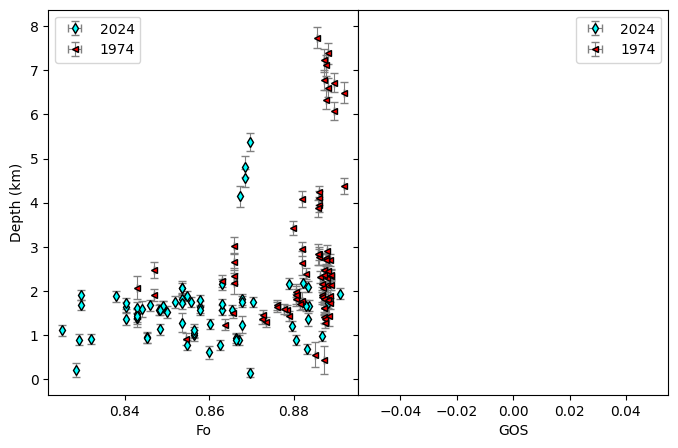

In [85]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (8,5),sharey=True)

ax1.errorbar(final_df['Fo'].loc[K24], final_df['SingleCalc_D_km'].loc[K24], xerr=0, yerr=final_df['std_dev_MC_D_km_from_percentile'].loc[K24],
             fmt='d', ecolor='grey', elinewidth=0.8, mfc='cyan', mec='k', capsize=3, label='2024', ms=5)
ax1.errorbar(final_df['Fo'].loc[U919], final_df['SingleCalc_D_km'].loc[U919], xerr=0, yerr=final_df['std_dev_MC_D_km_from_percentile'].loc[U919],
             fmt='<', ecolor='grey', elinewidth=0.8, mfc='red', mec='k', capsize=3, label='1974', ms=5)

ax1.set_xlabel('Fo')
ax1.set_ylabel('Depth (km)')
ax1.legend()

ax2.errorbar(final_df['GOS'].loc[K24], final_df['SingleCalc_D_km'].loc[K24], xerr=0, yerr=final_df['std_dev_MC_D_km_from_percentile'].loc[K24],
             fmt='d', ecolor='grey', elinewidth=0.8, mfc='cyan', mec='k', capsize=3, label='2024', ms=5)
ax2.errorbar(final_df['GOS'].loc[U919], final_df['SingleCalc_D_km'].loc[U919], xerr=0, yerr=final_df['std_dev_MC_D_km_from_percentile'].loc[U919],
             fmt='<', ecolor='grey', elinewidth=0.8, mfc='red', mec='k', capsize=3, label='1974', ms=5)

ax2.set_xlabel('GOS')

ax2.legend()
plt.subplots_adjust(wspace=0) 

In [118]:
final_df[final_df['SingleCalc_D_km']>4][['filename','GOS','SingleCalc_D_km']]

,filename,GOS,SingleCalc_D_km
80,KL0919-008-A,0.554341,7.737790
90,KL0919-013-A,0.635922,6.771967
91,KL0919-013-B,0.635922,7.111117
92,KL0919-013-C,0.635922,6.719386
110,919_56_A,0.118908,4.229915
111,919_56_A_drift,0.118908,4.106109
112,919_58_A,0.266591,4.084473
116,919_60_A,0.428472,6.489178
122,919_65_A_rep1_12mW,NaN,6.605082
123,919_65_A_rep2_6mW,NaN,7.388014


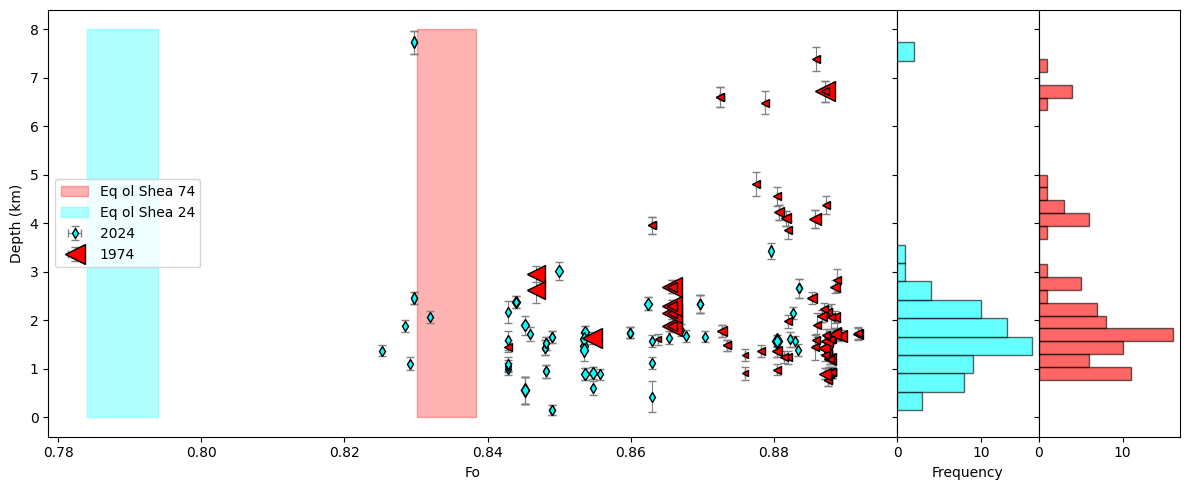

In [47]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Combine GOS values from both datasets
all_GOS = final_df['GOS']

# Global min and max of GOS
global_min_GOS = all_GOS.min()
global_max_GOS = all_GOS.max()

# Normalize GOS for marker sizing
normalized_GOS_K24 = (final_df['GOS'].loc[K24] - global_min_GOS) / (global_max_GOS - global_min_GOS)
normalized_GOS_U919 = (final_df['GOS'].loc[U919] - global_min_GOS) / (global_max_GOS - global_min_GOS)

# Scale marker sizes (e.g., between 5 and 15)
marker_size_K24 = 5 + 10 * normalized_GOS_K24
marker_size_U919 = 5 + 10 * normalized_GOS_U919

fig = plt.figure(figsize=(12, 5))
gs = gridspec.GridSpec(1, 3, width_ratios=[3, 0.5, 0.5], wspace=0)

ax1 = plt.subplot(gs[0])

# Calculate x coordinates and plot rectangles for Eq_Ol_19
x1 = np.mean(Eq_Ol_19['Eq Fo (Shea, Kd=0.325)'])
x2 = np.mean(Eq_Ol_19['Eq Fo (Shea, Kd=0.345)'])
ax1.fill_betweenx(y=[0, 8], x1=x1, x2=x2, color='red', alpha=0.3, label='Eq ol Shea 74')

# Calculate x coordinates and plot rectangles for Eq_Ol_24
x1 = np.mean(Eq_Ol_24['Eq Fo (Shea, Kd=0.325)'])
x2 = np.mean(Eq_Ol_24['Eq Fo (Shea, Kd=0.345)'])
ax1.fill_betweenx(y=[0, 8], x1=x1, x2=x2, color='cyan', alpha=0.3, label='Eq ol Shea 24')

# Plot error bars with marker sizes based on GOS
for i, (fo, depth, yerr, size) in enumerate(zip(final_df['Fo'].loc[K24], final_df['SingleCalc_D_km_pwrecalc'].loc[K24], final_df['std_dev_MC_D_km_from_percentile_pwrecalc'].loc[K24], marker_size_K24)):
    ax1.errorbar(fo, depth, xerr=0, yerr=yerr, fmt='d', ecolor='grey', elinewidth=0.8, mfc='cyan', mec='k', capsize=3, label='2024' if i == 0 else "", ms=size)

for i, (fo, depth, yerr, size) in enumerate(zip(final_df['Fo'].loc[U919], final_df['SingleCalc_D_km_pwrecalc'].loc[U919], final_df['std_dev_MC_D_km_from_percentile_pwrecalc'].loc[U919], marker_size_U919)):
    ax1.errorbar(fo, depth, xerr=0, yerr=yerr, fmt='<', ecolor='grey', elinewidth=0.8, mfc='red', mec='k', capsize=3, label='1974' if i == 0 else "", ms=size)

ax1.set_xlabel('Fo')
ax1.set_ylabel('Depth (km)')
ax1.legend()

# Histogram plot
ax2 = plt.subplot(gs[1], sharey=ax1)
ax3 = plt.subplot(gs[2], sharey=ax1, sharex=ax2)
ax2.hist(final_df['SingleCalc_D_km_pwrecalc'].loc[K24], bins=20, stacked=True, orientation='horizontal', color=['cyan'], ec='k', alpha=0.6)
ax3.hist(final_df['SingleCalc_D_km_pwrecalc'].loc[U919], bins=25, stacked=True, orientation='horizontal', color=['red'], ec='k', alpha=0.6)

ax2.set_xlabel('Frequency')
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax3.get_yticklabels(), visible=False)
plt.tight_layout()
fig.savefig('FoDepth.png', dpi=300)
plt.show()


#### Below this are tests ###

/var/folders/r2/dcn33vbj1x1b46n5mm7vn9bc0000gn/T/ipykernel_8604/2525518762.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


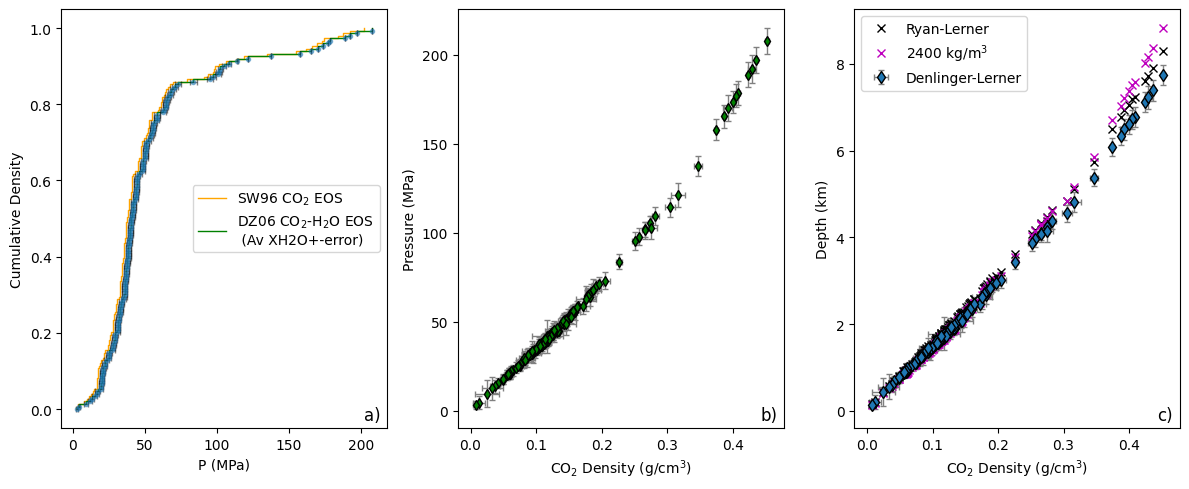

In [54]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,5))


## LETS SHOW A CDF FUNCTION OF THE PRESSURE DIFFERENCE - ITS SMALL ############

x1=100*P_DZ062['P_kbar_pureCO2_SW96']
x1_sorted=np.sort(x1)
ax1.step(np.concatenate([x1_sorted, x1_sorted[[-1]]]),
         np.arange(x1_sorted.size+1)/x1_sorted.size, color='orange', linewidth=1, label='SW96 CO$_2$ EOS')

x1=100*P_DZ062['P_kbar_mixCO2_DZ06_Hloss']
x1_sorted=np.sort(x1)
ax1.step(np.concatenate([x1_sorted, x1_sorted[[-1]]]),
         np.arange(x1_sorted.size+1)/x1_sorted.size, color='green', linewidth=1, label='DZ06 CO$_2$-H$_2$O EOS \n (Av XH2O+-error)')
plt.legend()

x2=100*P_DZ06_MinXH2O2['P_kbar_mixCO2_DZ06_Hloss']
x2_sorted=np.sort(x2)
# ax1.step(np.concatenate([x2_sorted, x2_sorted[[-1]]]),
#          np.arange(x2_sorted.size+1)/x2_sorted.size, color='red', linewidth=1, linestyle='-', label='DZ06')
y = np.arange(x1_sorted.size + 1) / x1_sorted.size  # Cumulative probability for each step


x3=100*P_DZ06_MaxXH2O2['P_kbar_mixCO2_DZ06_Hloss']
x3_sorted=np.sort(x3)
# ax1.step(np.concatenate([x3_sorted, x3_sorted[[-1]]]),
#          np.arange(x3_sorted.size+1)/x3_sorted.size, color='blue', linewidth=1, linestyle='-', label='DZ06')
ax1.legend()
ax1.set_xlabel('P (MPa)')
ax1.set_ylabel('Cumulative Density')


error = np.full_like(x1_sorted, 5)  # Replace 5 with your actual error values

# Adding horizontal error bars - notice 'fmt='none'' for no central marker, adjust 'ecolor' and 'elinewidth' as needed
ax1.errorbar(x1_sorted, y[:-1], xerr=[x3_sorted-x1_sorted, x1_sorted-x2_sorted], fmt='o', ms=3, ecolor='k', capsize=2, elinewidth=1, alpha=0.5)


ax2.plot()

ax2.errorbar(df_combo['Density g/cm3'], 100*MC_Av_rho_T_df_B['SingleCalc_Press_kbar'], 
             xerr=df_combo['σ Density g/cm3'], yerr=100*MC_Av_rho_T_df_B['std_dev_MC_P_kbar_from_percentile'],
               fmt='d', mec='k',ecolor='grey', mfc='green', ms=5, capsize=2, elinewidth=1, alpha=1)

ax2.set_xlabel('CO$_2$ Density (g/cm$^{3}$)')
ax2.set_ylabel('Pressure (MPa)')


# Lets show different density-depth models

Depth_RL=pf.convert_pressure_to_depth(P_kbar=P_DZ062['P_kbar_mixCO2_DZ06_Hloss'], model='ryan_lerner')
Depth_2400=pf.convert_pressure_to_depth(P_kbar=P_DZ062['P_kbar_mixCO2_DZ06_Hloss'], crust_dens_kgm3=2400)

ax3.errorbar(df_combo['Density g/cm3'], MC_Av_rho_T_df_B['SingleCalc_D_km'], 
             xerr=df_combo['σ Density g/cm3'], yerr=MC_Av_rho_T_df_B['std_dev_MC_D_km_from_percentile'],
               fmt='d', mec='k',  ecolor='grey', capsize=2, elinewidth=1, alpha=1, label='Denlinger-Lerner')

ax3.plot(df_combo['Density g/cm3'], Depth_RL, 'xk', label='Ryan-Lerner')
ax3.plot(df_combo['Density g/cm3'], Depth_2400, 'xm', label='2400 kg/m$^{3}$')
ax3.set_xlabel('CO$_2$ Density (g/cm$^{3}$)')
ax3.set_ylabel('Depth (km)')
ax3.legend()
fig.tight_layout()

ax1.annotate("a)", xy=(0.93, 0.02), xycoords="axes fraction", fontsize=12)
ax2.annotate("b)", xy=(0.93, 0.02), xycoords="axes fraction", fontsize=12)
ax3.annotate("c)", xy=(0.93, 0.02), xycoords="axes fraction", fontsize=12)
fig.savefig('Errors_2022FI.png', dpi=200)

In [55]:
np.nanmean(MC_Av_rho_T_df_B['std_dev_MC_D_km_from_percentile'])

0.1512147049414154

In [56]:

np.nanmean(MC_Av_rho_T_df_B['std_dev_MC_P_kbar_from_percentile'])*100

3.8183790524079484

In [57]:
np.nanmean(MC_Av_rho_T_df_B['std_dev_MC_D_km_from_percentile'])

0.1512147049414154

In [58]:
df_combo_clip=df_combo.copy()
# Lets strip out the columns we dont want.
df_combo_clip = df_combo_clip[[col for col in df_combo_clip.columns if not any(x in col for x in
                             ['Unnamed', 'cpxprim', 'Fo content (mol%)',  '_y', 'Preferred D_σ_Ne',
                              'Preferred D_σ_pkfit', 'HighD_RT', 'LowD_RT', '_SC'
                              ])]]





In [59]:
df_combo_clip.to_clipboard(excel=True, index=False)

In [60]:
df_combo_clip.columns[100:200]

Index(['Mean_MC_D_km', 'Med_MC_D_km', 'std_dev_MC_D_km',
       'std_dev_MC_D_km_from_percentile', 'T_K_input', 'error_T_K',
       'CO2_dens_gcm3_input', 'error_CO2_dens_gcm3', 'crust_dens_kgm3_input',
       'error_crust_dens_kgm3', 'model', 'EOS', 'XH2O_input', 'error_XH2O',
       'Total_wt%', 'Total_Oxide%', 'Al2O3', 'CaO', 'Cr2O3', 'FeOt', 'MgO',
       'MnO', 'NiO', 'SiO2', 'TiO2', 'Oxide % Sigma_Al2O3',
       'Oxide % Sigma_CaO', 'Oxide % Sigma_Cr2O3', 'Oxide % Sigma_FeOt',
       'Oxide % Sigma_MgO', 'Oxide % Sigma_MnO', 'Oxide % Sigma_NiO',
       'Oxide % Sigma_SiO2', 'Oxide % Sigma_TiO2', 'Al2O3_norm', 'CaO_norm',
       'Cr2O3_norm', 'FeOt_norm', 'MgO_norm', 'MnO_norm', 'NiO_norm',
       'SiO2_norm', 'TiO2_norm', 'Wt%_Al', 'Wt%_Ca', 'Wt%_Cr', 'Wt%_Fe',
       'Wt%_Mg', 'Wt%_Mn', 'Wt%_Ni', 'Wt%_O', 'Wt%_Si', 'Wt%_Ti',
       'Wt% Sigma_Al', 'Wt% Sigma_Ca', 'Wt% Sigma_Cr', 'Wt% Sigma_Fe',
       'Wt% Sigma_Mg', 'Wt% Sigma_Mn', 'Wt% Sigma_Ni', 'Wt% Sigma_Si',
       'Wt% Si

In [61]:
MC_Av_rho_T_df_B.to_clipboard(excel=True, index=False)

In [62]:
np.nanmedian(MC_Av_rho_T_df_B['std_dev_MC_D_km_from_percentile'])

0.12665081322074778

(array([60., 42., 10., 13.,  4., 10.,  7.,  2.,  0.,  1.]),
 array([2.32542797, 3.04277271, 3.76011745, 4.47746219, 5.19480693,
        5.91215167, 6.62949641, 7.34684115, 8.06418589, 8.78153063,
        9.49887537]),
 <BarContainer object of 10 artists>)

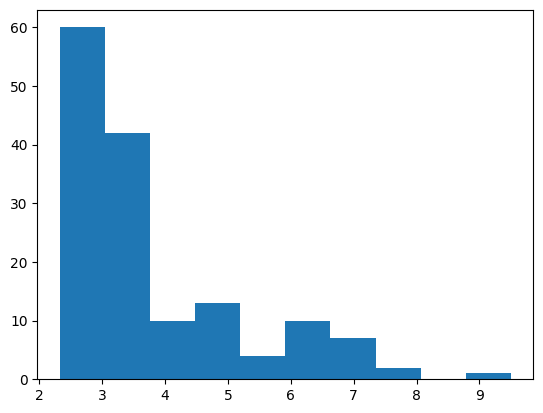

In [63]:
plt.hist(100*MC_Av_rho_T_df_B['std_dev_MC_P_kbar_from_percentile'])

In [64]:
MC_Av_rho_T_df_B.columns[0:100]

Index(['Filename', 'i', 'CO2_density_input', 'SingleCalc_D_km',
       'SingleCalc_Press_kbar', 'Mean_MC_P_kbar', 'Med_MC_P_kbar',
       'std_dev_MC_P_kbar', 'std_dev_MC_P_kbar_from_percentile',
       'Mean_MC_D_km', 'Med_MC_D_km', 'std_dev_MC_D_km',
       'std_dev_MC_D_km_from_percentile', 'T_K_input', 'error_T_K',
       'CO2_dens_gcm3_input', 'error_CO2_dens_gcm3', 'crust_dens_kgm3_input',
       'error_crust_dens_kgm3', 'model', 'EOS', 'XH2O_input', 'error_XH2O',
       'crystal'],
      dtype='object')

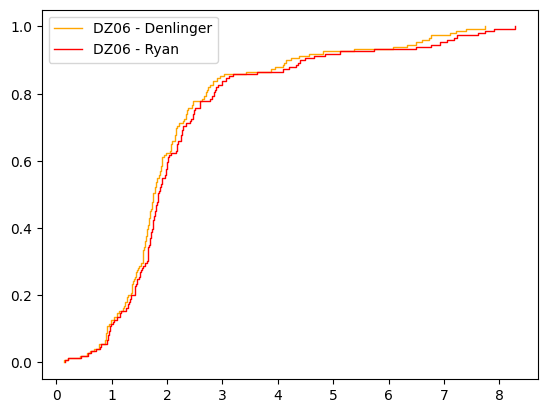

In [65]:
Depth_DL=pf.convert_pressure_to_depth(P_kbar=P_DZ06['P_kbar_mixCO2_DZ06_Hloss'], model='denlinger_lerner')
x1=Depth_DL
x1_sorted=np.sort(x1)
plt.step(np.concatenate([x1_sorted, x1_sorted[[-1]]]),
         np.arange(x1_sorted.size+1)/x1_sorted.size, color='orange', linewidth=1, label='DZ06 - Denlinger')

Depth_RL=pf.convert_pressure_to_depth(P_kbar=P_DZ06['P_kbar_mixCO2_DZ06_Hloss'], model='ryan_lerner')
x1=Depth_RL
x1_sorted=np.sort(x1)
plt.step(np.concatenate([x1_sorted, x1_sorted[[-1]]]),
         np.arange(x1_sorted.size+1)/x1_sorted.size, color='red', linewidth=1, label='DZ06 - Ryan')
plt.legend()

(array([ 3.,  9., 17., 31., 33., 20., 10.,  5.,  1.,  1.,  5.,  2.,  1.,
         1.,  0.,  1.,  2.,  3.,  2.,  2.]),
 array([0.14548928, 0.52510433, 0.90471938, 1.28433443, 1.66394948,
        2.04356452, 2.42317957, 2.80279462, 3.18240967, 3.56202472,
        3.94163977, 4.32125481, 4.70086986, 5.08048491, 5.46009996,
        5.83971501, 6.21933005, 6.5989451 , 6.97856015, 7.3581752 ,
        7.73779025]),
 <BarContainer object of 20 artists>)

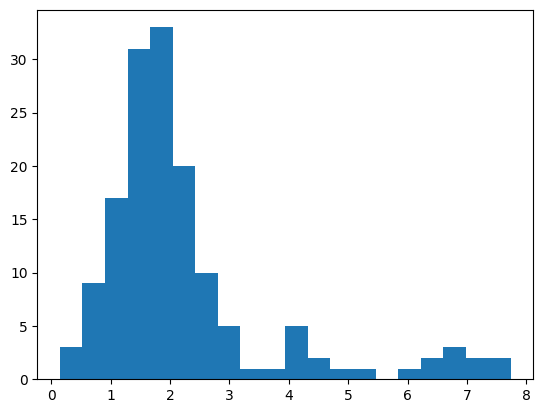

In [66]:
plt.hist(Depth_DL, bins=20)

In [67]:
sum(Depth_DL<2)

93

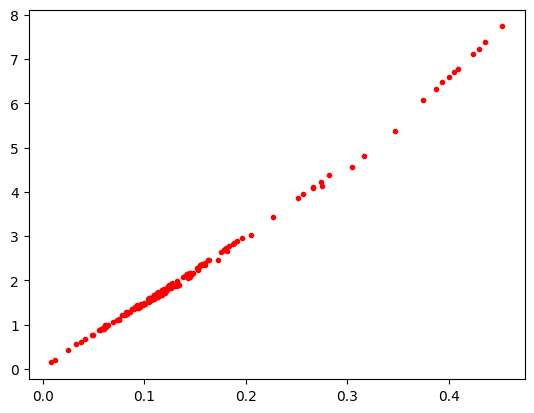

In [68]:
plt.plot(df_combo['Density g/cm3'], Depth_DL, '.r')

(array([ 3.,  9., 17., 31., 33., 20., 10.,  5.,  1.,  1.,  5.,  2.,  1.,
         1.,  0.,  1.,  2.,  3.,  2.,  2.]),
 array([0.14548928, 0.52510433, 0.90471938, 1.28433443, 1.66394948,
        2.04356452, 2.42317957, 2.80279462, 3.18240967, 3.56202472,
        3.94163977, 4.32125481, 4.70086986, 5.08048491, 5.46009996,
        5.83971501, 6.21933005, 6.5989451 , 6.97856015, 7.3581752 ,
        7.73779025]),
 <BarContainer object of 20 artists>)

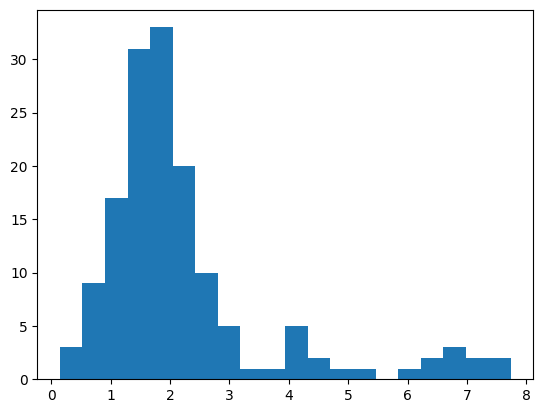

In [69]:
plt.hist(MC_Av_rho_T_df_B['SingleCalc_D_km'], bins=20)

In [70]:
print('Median P')
print(np.median(Depth_RL))
print('25 Quantile')
print(np.quantile(Depth_RL, 0.16))
print('75 Quantile')
print(np.quantile(Depth_RL, 0.84))

Median P
1.8406519706468971
25 Quantile
1.2797274036855657
75 Quantile
3.015881537660576


In [71]:
max(Depth_RL)

8.282918171855396

In [72]:
print('Median P')
print(np.median(P_DZ06['P_kbar_mixCO2_DZ06_Hloss']))
print('16 Quantile')
print(np.quantile(P_DZ06['P_kbar_mixCO2_DZ06_Hloss'], 0.16))
print('84 Quantile')
print(np.quantile(P_DZ06['P_kbar_mixCO2_DZ06_Hloss'], 0.84))

Median P
0.40998963650442627
16 Quantile
0.28196594083898696
84 Quantile
0.6872522055627865


(array([ 1.,  3.,  2.,  2.,  6., 11.,  3.,  2.,  0.,  1.]),
 array([0.1179792 , 0.24289875, 0.3678183 , 0.49273785, 0.6176574 ,
        0.74257694, 0.86749649, 0.99241604, 1.11733559, 1.24225513,
        1.36717468]),
 <BarContainer object of 10 artists>)

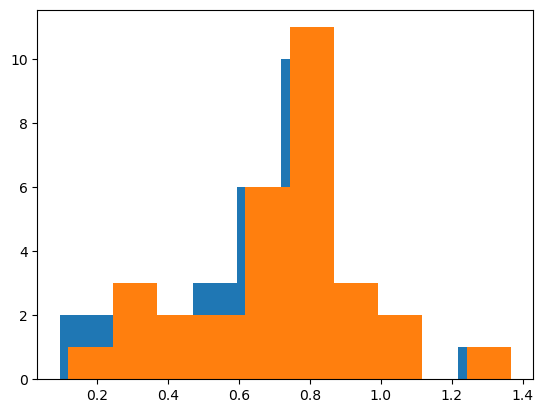

In [ ]:
plt.hist(P_DZ06['P_kbar_pureCO2_SW96'])
plt.hist(P_DZ06['P_kbar_mixCO2_DZ06_no_Hloss'])

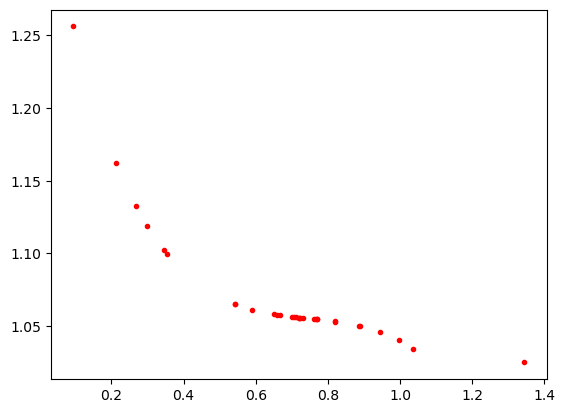

In [ ]:
plt.plot(P_DZ06['P_kbar_pureCO2_SW96'],  P_DZ06['P Mix_Hloss/P Pure DZ06'], '.r')

In [ ]:
0.5*np.abs(XH2O_max-XH2O_min)

array([0.03139561, 0.02805938, 0.02894046, 0.02868418, 0.02964105,
       0.02817475, 0.02944552, 0.05936877, 0.05042746, 0.06574182,
       0.07866803, 0.02586885, 0.02735616, 0.        , 0.02368957,
       0.02082461, 0.01786234, 0.11561941, 0.02577781, 0.05180682,
       0.02878375, 0.03330258, 0.02806323, 0.02886073, 0.02736898,
       0.02855738, 0.0286709 , 0.03331399, 0.02979726, 0.02868708,
       0.02810656])

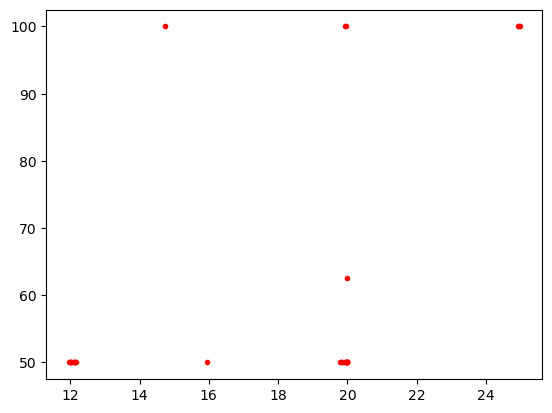

In [ ]:
plt.plot(df_combo['power (mW)'], df_combo['Mag (X)'], '.r')

## Showing H2O trends

In [ ]:
df_combo.to_clipboard(excel=True)

In [ ]:

ax1.plot(P_SW96['P_MPa'], XH2O, '.r')
ax2.plot(P_SW96['P_MPa'], SO2_frac, '.y')

ValueError: x and y must have same first dimension, but have shapes (31,) and (1,)

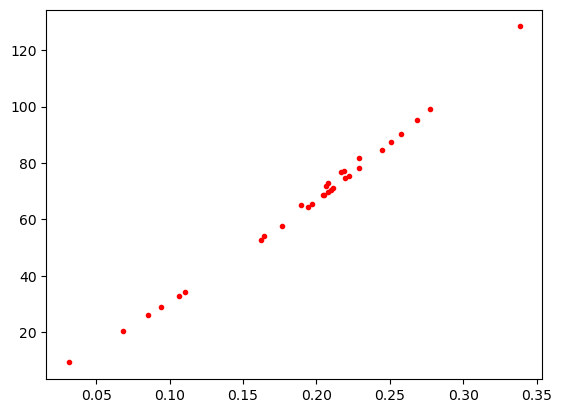

In [ ]:
#plt.plot(df_combo['Density g/cm3'], SO2_frac.fillna(0), '.r')
plt.plot(df_combo['Density g/cm3'], P_SW96['P_MPa'], '.r')


In [ ]:

df_FI_ML.head()



FI_1868=(df_FI_ML['filename'].str.contains('MLP'))
FI_1852=(df_FI_ML['filename'].str.contains('MP2'))

MC_Av_rho_T_ML, MC_All_rho_T_ML, fig=pf.propagate_FI_uncertainty(
T_K=df_FI_ML['Temp_from_Fo']+273.15,
error_T_K=np.std(df_FI_ML['Temp_from_Fo']), error_type_T_K='Abs', error_dist_T_K='normal',
CO2_dens_gcm3=df_FI_ML['Density g/cm3_x'],error_CO2_dens=df_FI_ML['σ Density g/cm3'], error_type_CO2_dens='Abs', error_dist_CO2_dens='normal',
sample_ID=df_FI_ML['filename'],
model='ryan_lerner', 
N_dup=1000, fig_i=0, plot_figure=False)



# Lets add the pressure back into the original df
df_FI_ML['D (km)']=MC_Av_rho_T_ML['SingleFI_P_kbar']
df_FI_ML['D (km)']=MC_Av_rho_T_ML['SingleCalc_D_km']

SyntaxError: invalid syntax (1880845484.py, line 14)

## Berenise 2022 data

In [ ]:
df_B=pd.read_excel('Berenise_2022.xlsx')
df_B.head()

MC_Av_rho_T_df_B, MC_All_rho_T_df_B, fig=pf.propagate_FI_uncertainty(
T_K=1299.4908415519822+273.15,
error_T_K=50, error_type_T_K='Abs', error_dist_T_K='normal',
CO2_dens_gcm3=df_B['Density g/cm3'],error_CO2_dens=df_B['σ Density g/cm3'], 
error_type_CO2_dens='Abs', error_dist_CO2_dens='normal',
sample_ID=df_B['filename'],
model='ryan_lerner',
N_dup=1000, fig_i=0, plot_figure=False)
MC_Av_rho_T_df_B.head()


df_B['D (km)']=MC_Av_rho_T_df_B['SingleFI_P_kbar']
df_B['D (km)']=MC_Av_rho_T_df_B['SingleCalc_D_km']



working on sample number 0
working on sample number 20


## For Kendra


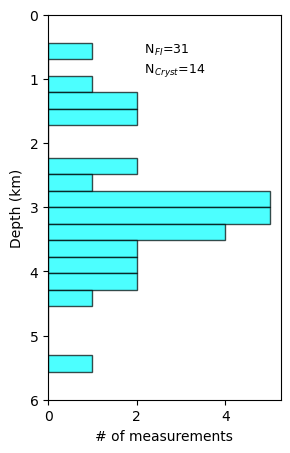

In [ ]:
from matplotlib import patches
fig, ((ax3b)) = plt.subplots(1, 1, figsize=(3,5))
M2022=pd.concat([df_FI_ML['D (km)'].loc[FI_2022], df_B['D (km)']])
ax3b.hist(M2022,alpha=0.7,
          orientation='horizontal',color='cyan', bins=20, ec='k')
ax3b.set_ylim([6, 0])
ax3b.set_ylabel('Depth (km)')
ax3b.set_xlabel('# of measurements')


ax3b.annotate(" N$_{FI}$=" + str(len(M2022)), 
              xy=(0.4, 0.9), xycoords="axes fraction", fontsize=9)
# ax3b.annotate(" N$_{\, Fo}$=" + str(sum(df_FI['Fo'].loc[FI_2022]>0)), 
#               xy=(0.4, 0.9), xycoords="axes fraction", fontsize=9)
ax3b.annotate(" N$_{Cryst}$=" + str(len(df_FI_ML['crystal'].loc[FI_2022].unique())+len(df_B['crystal'].unique()) ), 
              xy=(0.4, 0.85), xycoords="axes fraction", fontsize=9)

#ax3b.plot(5.5+np.random.normal(-0.01, 0.01, size=len(M2022)), M2022, 'xc', ms=3)

fig.savefig('Depths_for_kendra.pdf', dpi=300)


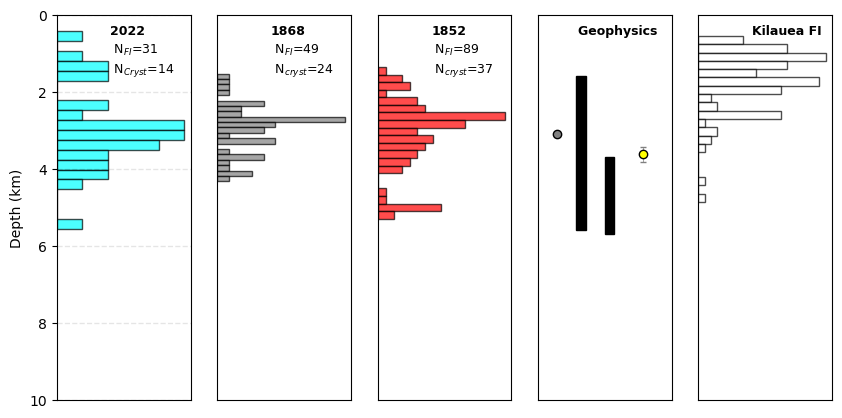

In [ ]:
from matplotlib import patches
fig, ((ax3b, ax3c, ax3d,  ax3e, ax3k)) = plt.subplots(1, 5, figsize=(10,5), sharey=True,gridspec_kw={'width_ratios': [0.7, 0.7, 0.7, 0.7, 0.7]})
plt.subplots_adjust(wspace=0.2, hspace=0)

ax3b.axes.get_xaxis().set_visible(False)
#ax3b.axes.get_yaxis().set_visible(False)
ax3c.axes.get_xaxis().set_visible(False)
ax3c.axes.get_yaxis().set_visible(False)
ax3d.axes.get_xaxis().set_visible(False)
ax3d.axes.get_yaxis().set_visible(False)

# 2022 combined
M2022=pd.concat([df_FI_ML['D (km)'].loc[FI_2022], df_B['D (km)']])
ax3b.hist(M2022,alpha=0.7,density=1,
          orientation='horizontal',color='cyan', bins=20, ec='k')


# 1868
ax3c.hist(df_FI_ML['D (km)'].loc[FI_1868],alpha=0.7,density=1,
          orientation='horizontal',color='grey', ec='k', bins=20)

# 1852
ax3d.hist(df_FI_ML['D (km)'].loc[FI_1852],alpha=0.7,density=1,
          orientation='horizontal',color='red', ec='k', bins=20)

ax3b.annotate("2022", 
              xy=(0.4, 0.95), xycoords="axes fraction", fontsize=9,fontweight='bold')
ax3b.annotate(" N$_{FI}$=" + str(len(M2022)), 
              xy=(0.4, 0.9), xycoords="axes fraction", fontsize=9)
# ax3b.annotate(" N$_{\, Fo}$=" + str(sum(df_FI['Fo'].loc[FI_2022]>0)), 
#               xy=(0.4, 0.9), xycoords="axes fraction", fontsize=9)
ax3b.annotate(" N$_{Cryst}$=" + str(len(df_FI_ML['crystal'].loc[FI_2022].unique())+len(df_B['crystal'].unique()) ), 
              xy=(0.4, 0.85), xycoords="axes fraction", fontsize=9)


ax3c.annotate("1868", 
              xy=(0.4, 0.95), xycoords="axes fraction", fontsize=9,fontweight='bold')
ax3c.annotate(" N$_{FI}$=" + str(sum(df_FI_ML['D (km)'].loc[FI_1868]>0)), 
              xy=(0.4, 0.9), xycoords="axes fraction", fontsize=9)
# ax3c.annotate(" N$_{\, Fo}$=" + str(sum(df_FI['Fo'].loc[FI_1868]>0)), 
#               xy=(0.4, 0.9), xycoords="axes fraction", fontsize=9)
ax3c.annotate(" N$_{cryst}$=" + str(len(df_FI_ML['crystal'].loc[FI_1868].unique())), 
              xy=(0.4, 0.85), xycoords="axes fraction", fontsize=9)

ax3d.annotate("1852", 
              xy=(0.4, 0.95), xycoords="axes fraction", fontsize=9,fontweight='bold')
ax3d.annotate(" N$_{FI}$=" + str(sum(df_FI_ML['D (km)'].loc[FI_1852]>0)), 
              xy=(0.4, 0.9), xycoords="axes fraction", fontsize=9)
# ax3d.annotate(" N$_{\, Fo}$=" + str(sum(df_FI['Fo'].loc[FI_1852]>0)), 
#               xy=(0.4, 0.9), xycoords="axes fraction", fontsize=9)
ax3d.annotate(" N$_{cryst}$=" + str(len(df_FI_ML['crystal'].loc[FI_1852].unique())), 
              xy=(0.4, 0.85), xycoords="axes fraction", fontsize=9)

ax3e.annotate("Geophysics ", 
              xy=(0.3, 0.95), xycoords="axes fraction", fontsize=9, fontweight='bold')

# Decker et al. 1983 - Mogi source 3.1
ax3e.errorbar(0.1, 3.1,
xerr=0, yerr=0.0,
fmt='o', ecolor='grey', elinewidth=0.5, mfc='grey', ms=6, mec='k', capsize=2, label='2022')


# Yun et al. (2005 )- 3.6 km radius of 2km - From inteferograms Jan 2002-May 2004
rect_Y2005 = patches.Rectangle((0.2, 3.6-2),0.05,4,linewidth=1,edgecolor='k',facecolor='black', label='Yun et al. 2005')
ax3e.add_patch(rect_Y2005)
# Amelung et al. 2006 - 4.7+-1 - inflation
rect_Y2005 = patches.Rectangle((0.35, 4.7-1),0.05,2,linewidth=1,edgecolor='k',facecolor='black', label='Amelung et al. 2007')
ax3e.add_patch(rect_Y2005)
# Johnson  - gravity
ax3e.errorbar(0.55, 3.63,
xerr=0, yerr=0.2,
fmt='o', ecolor='grey', elinewidth=0.5, mfc='yellow', ms=6, mec='k', capsize=2, label='2022')


ax3k.annotate("Kilauea FI", 
              xy=(0.4, 0.95), xycoords="axes fraction", fontsize=9, fontweight='bold')


ax3k.hist(df_FI_Kil['D (km)'],alpha=0.7,density=1,
          orientation='horizontal',color='white', bins=20, ec='k')

#ax3b.axes.get_xaxis().set_visible(False)
#ax3b.axes.get_yaxis().set_visible(False)
ax3c.axes.get_xaxis().set_visible(False)
ax3c.axes.get_yaxis().set_visible(False)
ax3d.axes.get_xaxis().set_visible(False)
ax3d.axes.get_yaxis().set_visible(False)
ax3e.axes.get_xaxis().set_visible(False)
ax3e.axes.get_yaxis().set_visible(False)
ax3k.axes.get_yaxis().set_visible(False)
ax3k.axes.get_xaxis().set_visible(False)
#ax3b.set_ylim([6,14])
#ax3b.axis("off")
#ax2.set_ylim([6, 0])
#ax2.grid(color = 'k', linestyle = '--', linewidth = 1, alpha = 0.1)
ax3b.grid(color = 'k', linestyle = '--', linewidth = 1, alpha = 0.1)
ax3c.grid(color = 'k', linestyle = '--', linewidth = 1, alpha = 0.1)
ax3d.grid(color = 'k', linestyle = '--', linewidth = 1, alpha = 0.1)
ax3e.set_xlim([0, 0.7])
ax3b.set_ylim([10, 0])
#ax3a.set_ylim([0, ])
ax3b.set_ylabel('Depth (km)')
ax3b.set_xlabel('Host olivine Forsterite')

#ax2.legend()
fig.savefig('MaunaLoa_Depth.png', dpi=200)